# Question 1: What is the difference between K-Means and Hierarchical Clustering? Provide a use case for each.

Ans-

```
| Aspect                 | **K-Means Clustering**                                 | **Hierarchical Clustering**                                                                               |
| ---------------------- | ------------------------------------------------------ | --------------------------------------------------------------------------------------------------------- |
| **Approach**           | Partitional – divides data into *k* clusters directly. | Agglomerative (bottom-up) or Divisive (top-down) – builds a hierarchy of clusters.                        |
| **Number of Clusters** | Requires predefining *k* (the number of clusters).     | No need to predefine; you can choose the number of clusters by cutting the dendrogram at a desired level. |
| **Computation**        | Faster and efficient for large datasets.               | Computationally expensive (slower for large datasets).                                                    |
| **Cluster Shape**      | Works best when clusters are spherical/equal size.     | Can handle complex cluster shapes.                                                                        |
| **Output**             | Flat clustering (only groups, no hierarchy).           | Produces a dendrogram (tree-like structure showing relationships).                                        |
| **Scalability**        | Scales well with big data.                             | Suitable for small to medium datasets.                                                                    |

```

Use Cases

✅ K-Means Clustering

- Customer Segmentation in Marketing: Grouping customers into clusters based on purchase history, demographics, or browsing behavior to target promotions.
(Fast and works well when you know the approximate number of customer groups.)

✅ Hierarchical Clustering

- Gene/Protein Similarity Analysis in Bioinformatics: Building a dendrogram to see how genes/proteins are related to each other.
(Useful when you don’t know the number of clusters in advance and want to visualize relationships.)


# Question 2: Explain the purpose of the Silhouette Score in evaluating clusterin algorithms.
Ans-

The **Silhouette Score** is a metric used to evaluate the quality of clustering results.  

It measures:
- **Cohesion (a):** How close a point is to other points in the same cluster.
- **Separation (b):** How far a point is from the nearest other cluster.

The formula is:

S = (b - a) / max(a, b)

- **+1 →** Well-clustered point  
- **0 →** Point on the boundary between clusters  
- **-1 →** Misclassified point (likely in the wrong cluster)

## Why it is important?
- Helps decide the **optimal number of clusters**.
- Compares clustering performance across algorithms.
- Ensures clusters are both **compact and well-separated**.


#Question 3: What are the core parameters of DBSCAN, and how do they influence the clustering process?
Ans-

## Core Parameters

1. **eps (ε - Epsilon radius)**  
   - Defines the maximum distance between two points for them to be considered as neighbors.  
   - **Small eps →** Many small clusters or noise.  
   - **Large eps →** Fewer, larger clusters (risk of merging unrelated points).  

2. **min_samples (Minimum Points)**  
   - The minimum number of points required to form a dense region (a cluster).  
   - **Small min_samples →** More clusters, even small/noisy ones.  
   - **Large min_samples →** Only bigger/denser clusters are formed, more points may be labeled as noise.  

3. **metric (Distance Measure)**  
   - The distance function used (default = Euclidean).  
   - Different metrics (e.g., Manhattan, cosine) can change clustering results.  

---

## Influence on Clustering
- **eps** controls how close points must be to join the same cluster.  
- **min_samples** controls how many points are needed to call a group a cluster.  
- Together, they determine whether a point is:  
  - **Core Point** (enough neighbors within eps),  
  - **Border Point** (close to a core but with fewer neighbors), or  
  - **Noise Point** (outlier).


#Question 4: Why is feature scaling important when applying clustering algorithms like K-Means and DBSCAN?

Ans-

## Why Feature Scaling is Important?

Clustering algorithms like **K-Means** and **DBSCAN** rely on **distance-based calculations** (usually Euclidean distance).  

If features are not on the same scale:  
- Variables with **larger ranges** dominate the distance measure.  
- The clustering result becomes biased and inaccurate.  

### Example:
- Feature 1: "Age" (20–60)  
- Feature 2: "Income" (20,000–100,000)  

Without scaling, "Income" will overpower "Age" in distance calculations.  

---

## K-Means:
- Assigns clusters based on **centroid distance**.  
- If features are unscaled, centroids shift towards features with higher magnitude.  

## DBSCAN:
- Forms clusters based on **density within eps (ε)**.  
- If features are unscaled, the definition of "dense region" gets distorted.  

---

## Solution:
- Apply **Standardization** (Z-score: mean=0, std=1)  
- Or **Normalization** (range: 0 to 1)  
before applying clustering.



# Question 5: What is the Elbow Method in K-Means clustering and how does it help determine the optimal number of clusters?

Ans-

## What is the Elbow Method?

The **Elbow Method** is a technique used to find the **optimal number of clusters (k)** in **K-Means Clustering**.  

It works by plotting:  
- **X-axis:** Number of clusters (k)  
- **Y-axis:** Within-Cluster-Sum of Squared Errors (WCSS)  
   - WCSS = sum of squared distances of each point to its assigned cluster center.

As **k increases**, WCSS decreases because clusters get smaller and tighter.  
- Initially, WCSS drops quickly.  
- After a certain point, the improvement slows down and forms an **“elbow shape”** in the graph.  
- The value of **k at the elbow point** is considered the **optimal number of clusters**.

---

## Why it is Useful?
- Prevents choosing too few clusters (underfitting).  
- Prevents choosing too many clusters (overfitting, unnecessary complexity).  
- Provides a simple **visual method** for cluster selection.


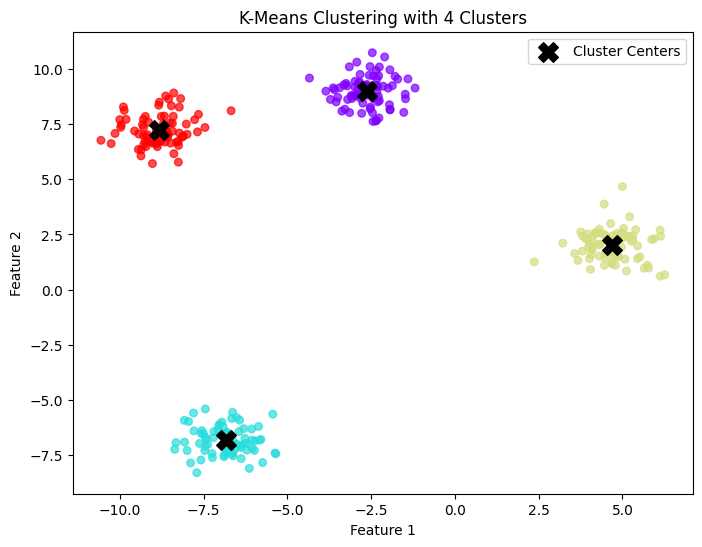

In [ ]:
#6. Generate synthetic data using make_blobs(n_samples=300, centers=4), apply KMeans clustering, and visualize the results with cluster centers.
# Import libraries
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Generate synthetic dataset
X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.7, random_state=42)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=42)
labels = kmeans.fit_predict(X)
centers = kmeans.cluster_centers_

# Visualize clusters and their centers
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap="rainbow", s=30, alpha=0.7)
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, marker='X', label="Cluster Centers")
plt.title("K-Means Clustering with 4 Clusters")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()


In [ ]:
#7. Load the Wine dataset, apply StandardScaler , and then train a DBSCAN model. Print the number of clusters found (excluding noise).
# Import libraries
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import numpy as np

# Load the Wine dataset
data = load_wine()
X = data.data

# Apply StandardScaler (important for DBSCAN)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train DBSCAN model
dbscan = DBSCAN(eps=1.5, min_samples=5)   # you can tune eps & min_samples
labels = dbscan.fit_predict(X_scaled)

# Count clusters (excluding noise = label -1)
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)

print("Number of clusters found (excluding noise):", n_clusters)


Number of clusters found (excluding noise): 0


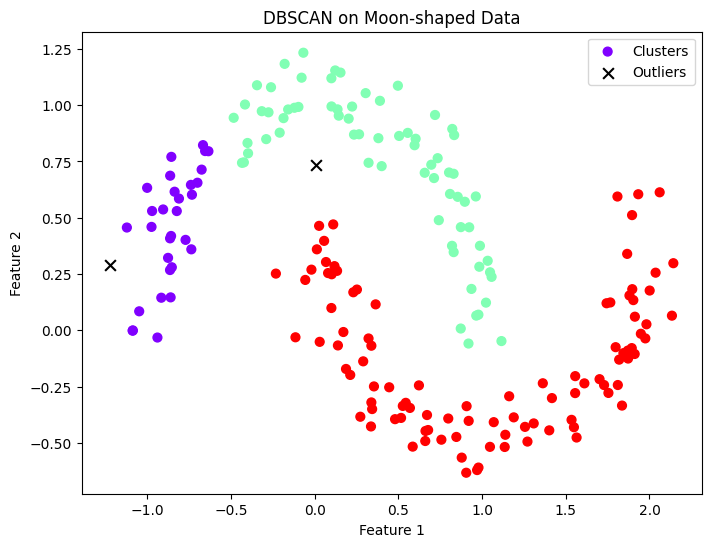

In [ ]:
#8: Generate moon-shaped synthetic data using make_moons(n_samples=200, noise=0.1), apply DBSCAN, and highlight the outliers in the plot.
# Import libraries
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import numpy as np

# Generate moon-shaped synthetic data
X, _ = make_moons(n_samples=200, noise=0.1, random_state=42)

# Apply DBSCAN
dbscan = DBSCAN(eps=0.2, min_samples=5)
labels = dbscan.fit_predict(X)

# Identify outliers (label = -1)
outliers = labels == -1
clusters = labels != -1

# Plot clusters and outliers
plt.figure(figsize=(8, 6))
plt.scatter(X[clusters, 0], X[clusters, 1], c=labels[clusters], cmap="rainbow", s=40, label="Clusters")
plt.scatter(X[outliers, 0], X[outliers, 1], c='black', marker='x', s=60, label="Outliers")
plt.title("DBSCAN on Moon-shaped Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()


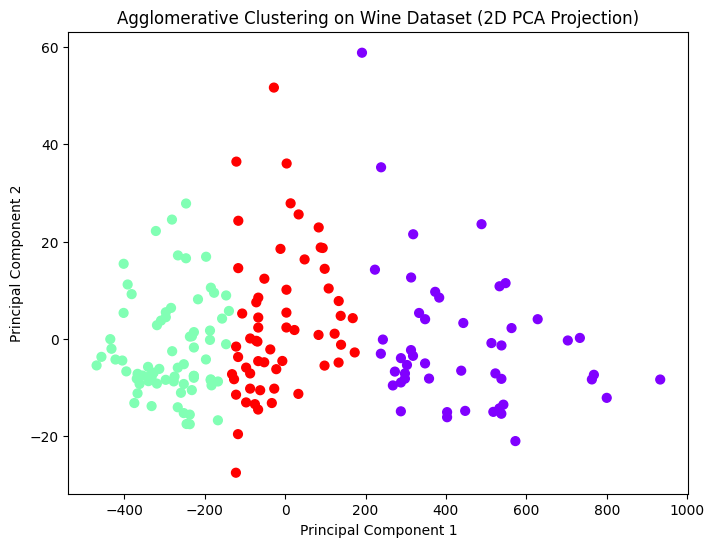

In [ ]:
# 9: Load the Wine dataset, reduce it to 2D using PCA, then apply Agglomerative Clustering and visualize the result in 2D with a scatter plot.

# Import libraries
from sklearn.datasets import load_wine
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

# Load the Wine dataset
data = load_wine()
X = data.data

# Reduce to 2D using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Apply Agglomerative Clustering
agg = AgglomerativeClustering(n_clusters=3)  # Wine dataset has 3 classes
labels = agg.fit_predict(X_pca)

# Plot the results
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap="rainbow", s=40)
plt.title("Agglomerative Clustering on Wine Dataset (2D PCA Projection)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()


# Question 10: You are working as a data analyst at an e-commerce company. The marketing team wants to segment customers based on their purchasing behavior to run targeted promotions. The dataset contains customer demographics and their product purchase history across categories. Describe your real-world data science workflow using clustering:
● Which clustering algorithm(s) would you use and why?
● How would you preprocess the data (missing values, scaling)?
● How would you determine the number of clusters?
● How would the marketing team benefit from your clustering analysis?

Ans-
# Customer Segmentation Using Clustering – Data Science Workflow

## 1. Choosing the Clustering Algorithm
- **K-Means**: Good for large datasets, efficient, finds clear customer groups.  
- **DBSCAN**: Helps detect outliers (e.g., very high spenders).  
- **Hierarchical Clustering**: Useful for visualization and exploratory analysis.  

👉 Start with **K-Means** for main segmentation, validate with other methods if needed.

---

## 2. Data Preprocessing
- Handle missing values:
  - Demographics → fill with mean/median/mode.  
  - Purchases → missing = 0 (no purchase).  
- Encode categorical variables (e.g., gender, location → One-Hot Encoding).  
- Apply **StandardScaler** (distance-based algorithms require scaling).  
- Optionally reduce dimensions with **PCA** for visualization.

---

## 3. Determining the Number of Clusters
- **Elbow Method** → WCSS vs k.  
- **Silhouette Score** → cluster quality.  
- Combine with business intuition.

---

## 4. Benefits for Marketing
- Personalized promotions.  
- Customer retention (identify high-value buyers).  
- Cross-selling opportunities.  
- Efficient ad spend with targeted campaigns.  

